In [38]:
# importing libraries

import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

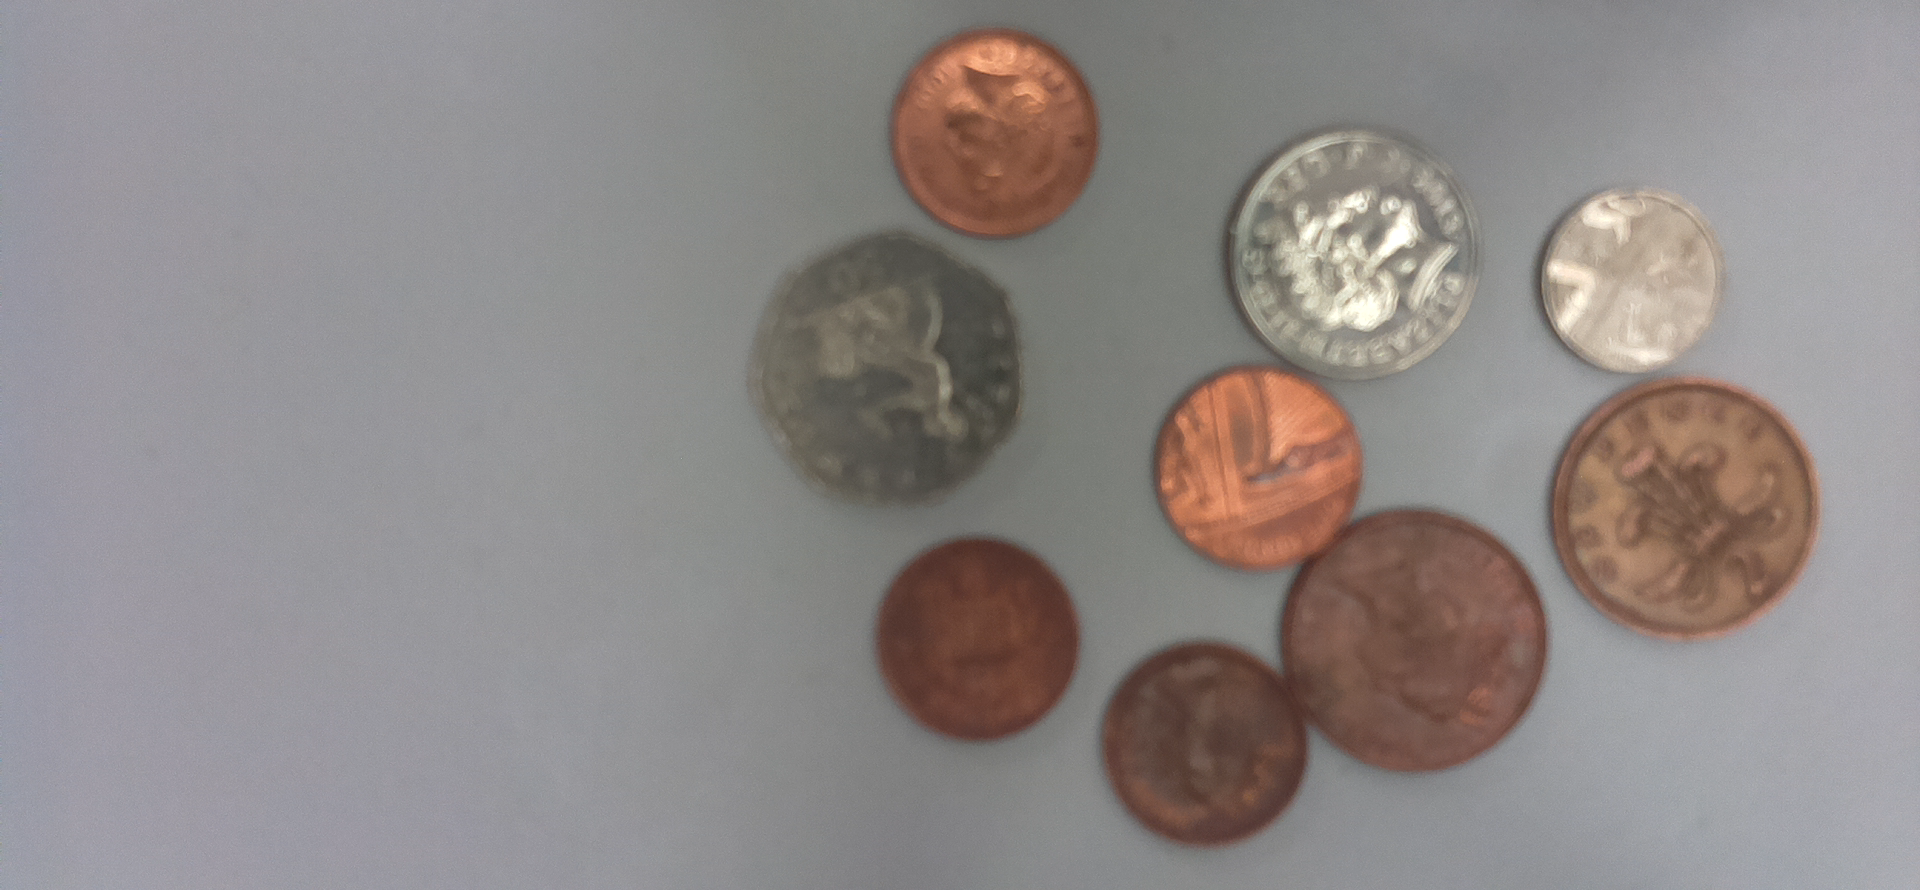

In [39]:
# Original
original_image = cv.imread('/content/19.3 capstone_coins (1).png', 1)
cv2_imshow(original_image)

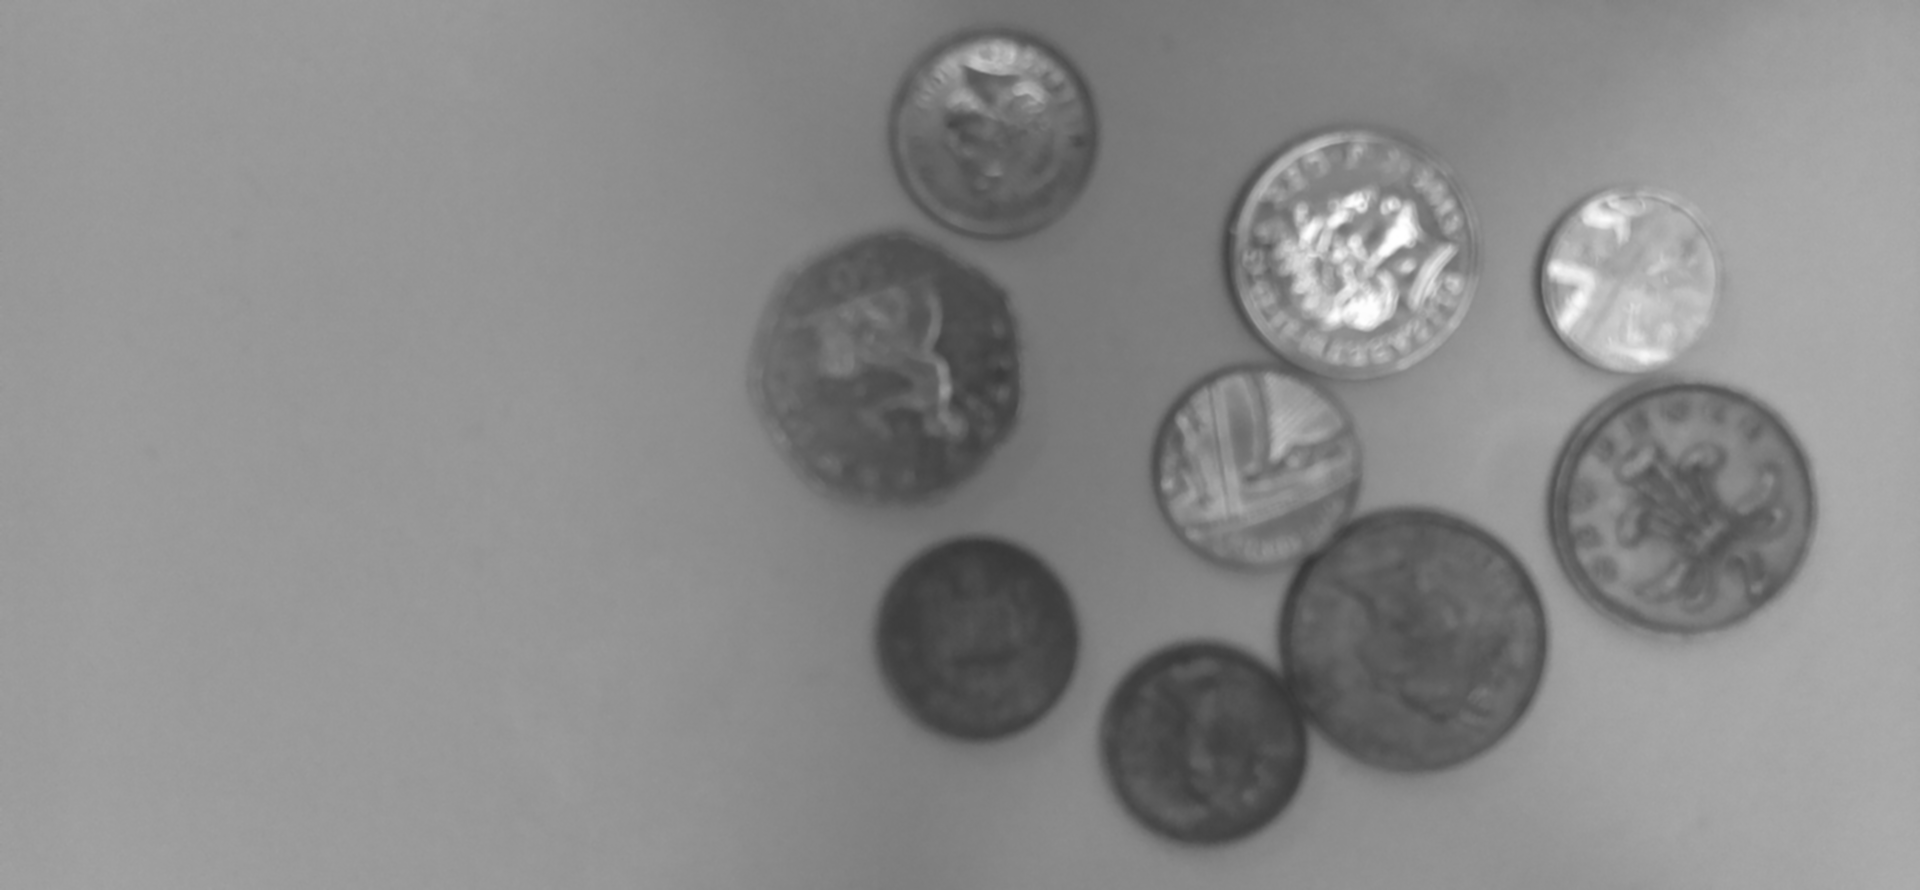

[[[1357.5  253.5  112.8]
  [1629.5  281.5   88.8]
  [ 994.5  132.5  108. ]
  [1203.5  742.5  103.1]
  [ 976.5  638.5   99.5]
  [1696.5  500.5  119.4]
  [1256.5  467.5  106.1]
  [1433.5  642.5  119.4]]]


In [40]:
# GreyScale
img = cv.imread('/content/19.3 capstone_coins (1).png', cv.IMREAD_GRAYSCALE)

# Blur
img = cv.GaussianBlur( img, (5, 5), 0)
cv2_imshow(img)

# Getting Circles
circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 0.9, 120, param1=50, param2=27, minRadius=60, maxRadius=120)
print(circles)

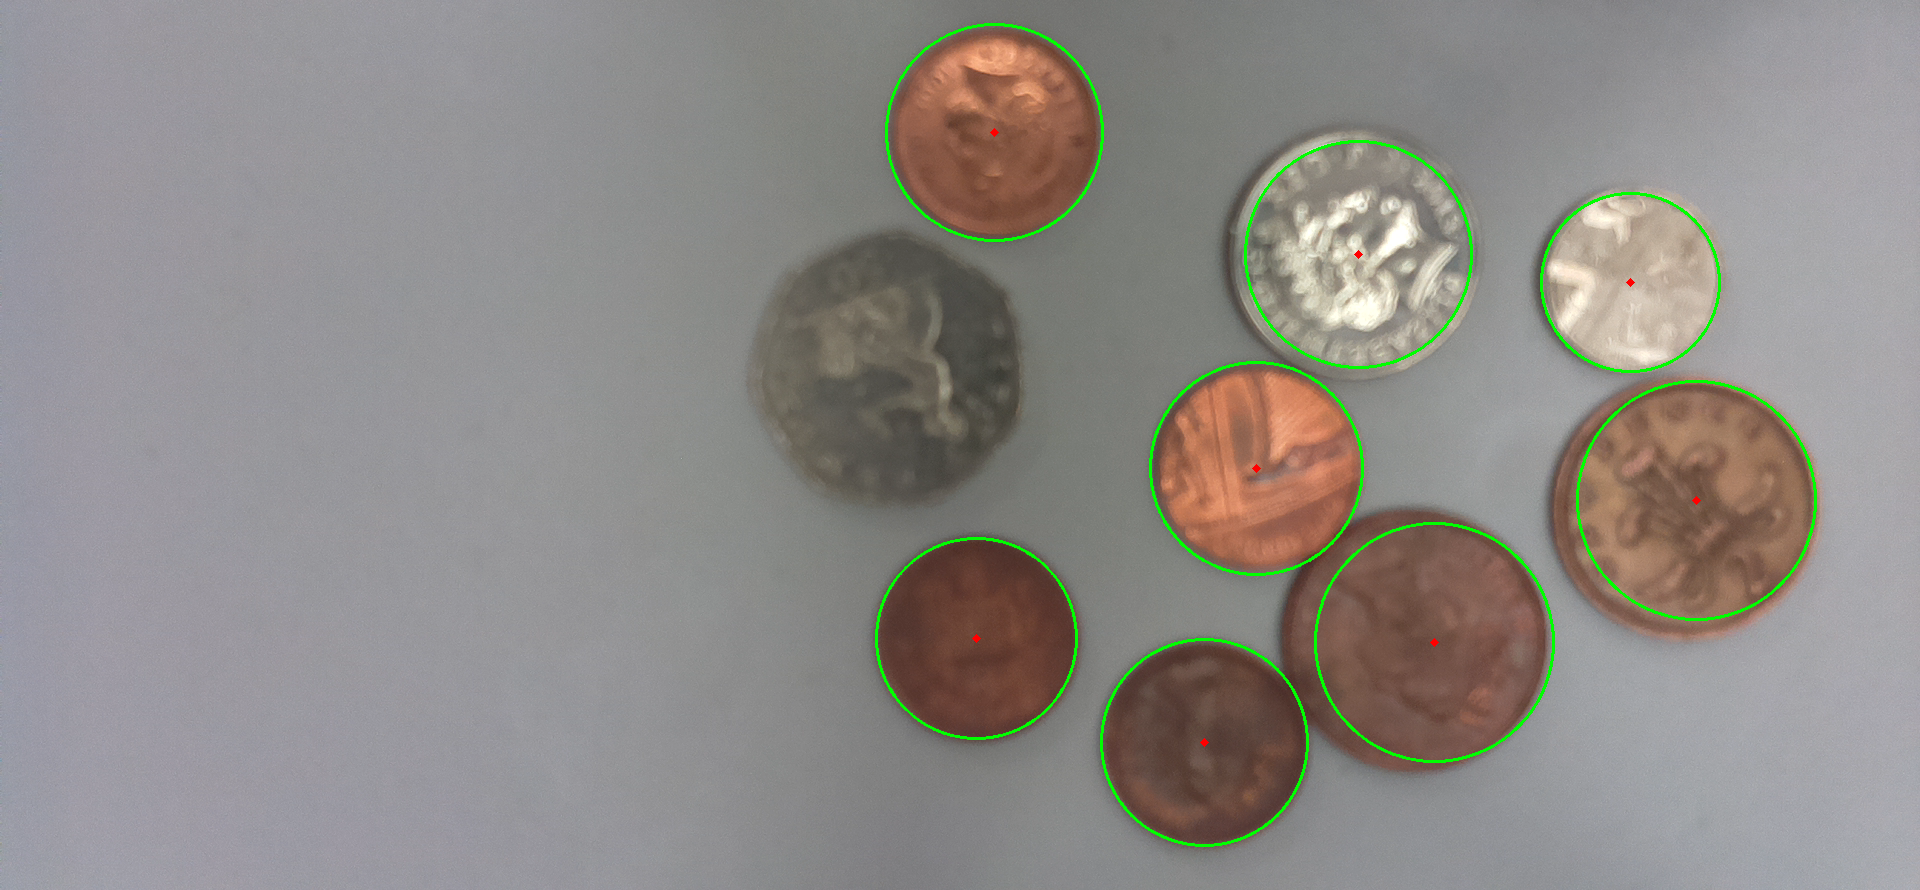

In [41]:
# Drawing Circles

# Rounding Circles
circles = np.uint16(np.around(circles))
count = 1
for i in circles[0,:]:

  # Outer Circles
  cv.circle(original_image, (i[0], i[1]), i[2], (0,255,0), 2)

  # Centers
  cv.circle(original_image, (i[0], i[1]), 2, (0, 0, 255), 3 )

  # cv.putText(original_image, str(count), (i[0], i[1]), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2)

  count += 1

# Showing the image
cv2_imshow(original_image)


In [42]:
# Getting Radii

def get_radius(circles):
  radius = []
  for coords in circles[0,:]:
    radius.append(coords[2])
  return radius 

radii = get_radius(circles)
print(radii)


[113, 89, 108, 103, 100, 119, 106, 119]


In [43]:
# Getting Brightness

def av_pix(img, circles, size):
  av_value = []
  for coords in circles[0,:]:
    col = np.mean(img[coords[1]-size:coords[1]+size, coords[0]-size:coords[0]+size])
    # print(img[coords[1]-size:coord[1]+size, coords[0]-size:coord[0]+size])
    av_value.append(col)
  return av_value  

bright_values = av_pix( original_image, circles, 20 ) 
print(bright_values)

[178.8625, 175.941875, 97.946875, 75.31, 74.64729166666666, 92.86479166666666, 123.29125, 86.300625]


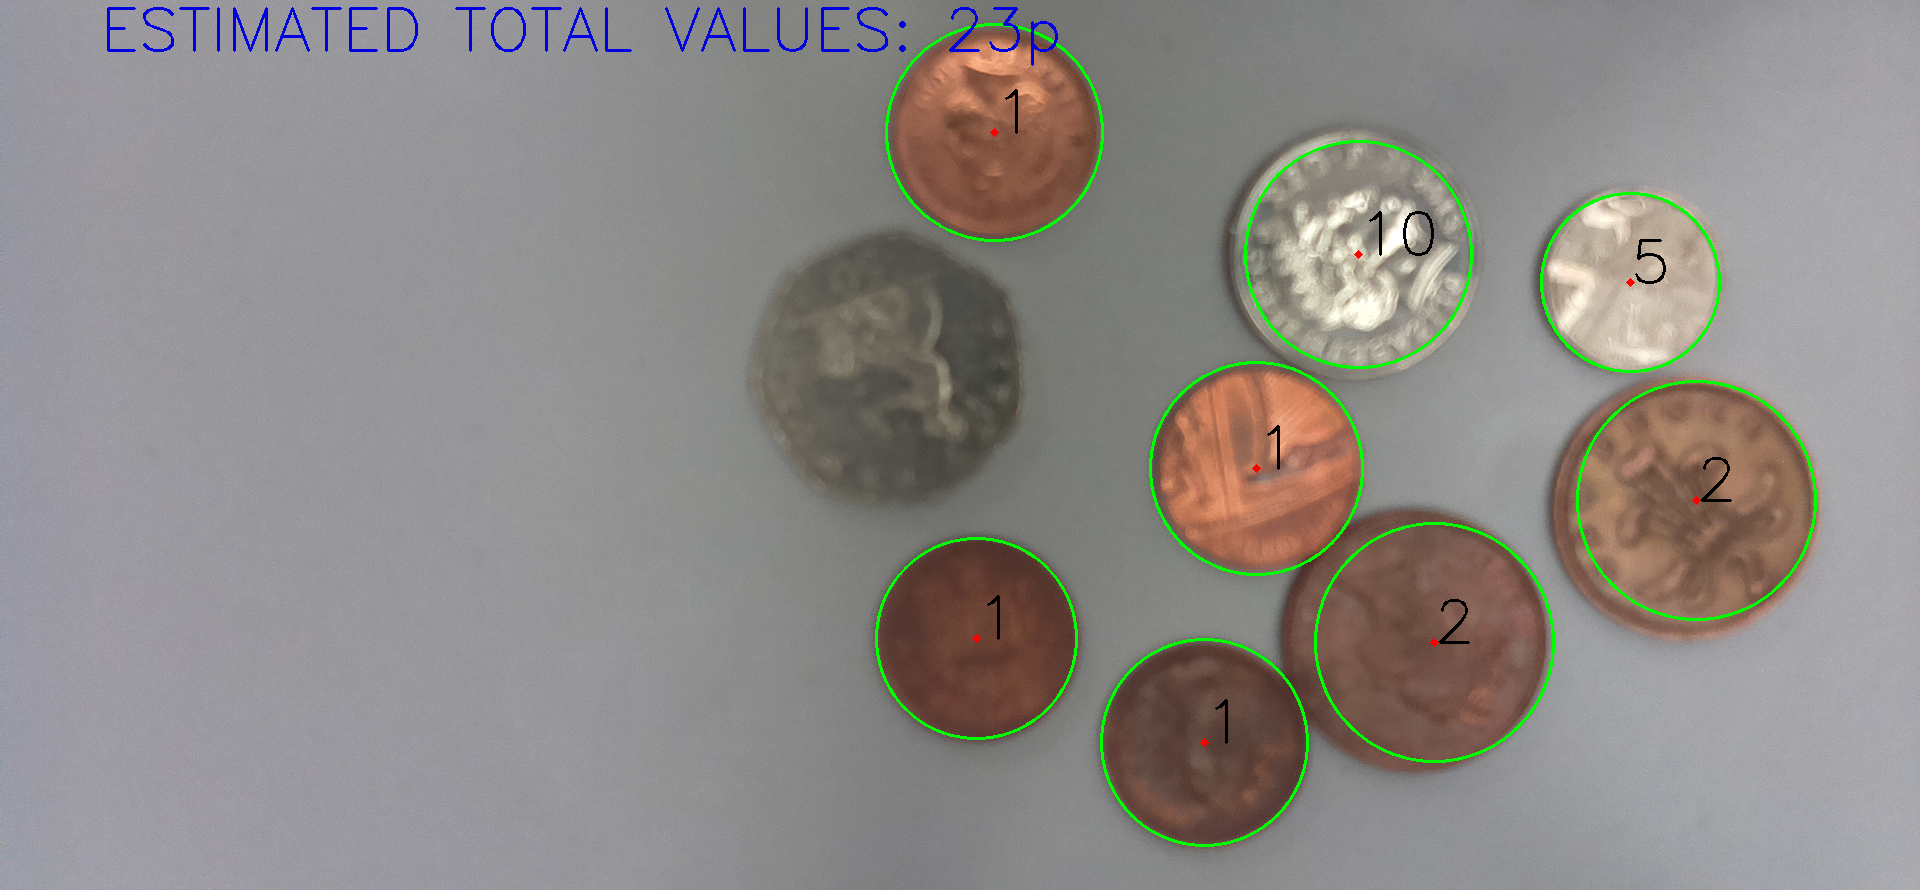

In [44]:

# Getting Values 

values = []
for a,b in zip(bright_values, radii):
  
  if a>150 and b>110:
    values.append(10)
  elif a>150 and b<=110:
    values.append(5)
  elif a<150 and b>110:
    values.append(2) 
  elif a<150 and b<110:
    values.append(1)

# print(values)  

count_2 = 0
for i in circles[0,:]:
  cv.putText
  cv.putText(original_image, str(values[count_2]), (i[0], i[1]), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2)
  count_2 += 1

cv.putText(original_image, 'ESTIMATED TOTAL VALUES: ' + str(sum(values)) + 'p', (100, 50), cv.FONT_HERSHEY_SIMPLEX, 2, (225,0,0), 2)

cv2_imshow(original_image)
